In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from IPython.display import display
from scipy.interpolate import interp1d

In [3]:
df = pd.read_csv('reviews_wpars_wsents_wbusinfo.csv')

#### Exploration

In [4]:
df.shape

(10954, 27)

In [5]:
# which businesses have the most reviews? 
from collections import Counter

print(Counter(df['category']))

Counter({'food': 6577, 'entertainment': 1682, 'nightlife': 507, 'restaurants': 451, 'beauty': 374, 'retail': 355, 'travel': 280, 'homeservices': 262, 'auto': 219, 'health': 132, 'professionalservices': 42, 'shopping': 37, 'education': 23, 'localservices': 8, 'hotelstravel': 4, 'arts': 1})


#### Get results

- How do sentiments change over time? 
- How do sentiments per type of business change over time? 

#### Sentiments for a specific business over time

IDs for testing: 
'EQ-TZ2eeD_E0BHuvoaeG5Q': 400, 

'Q-prSTdggNlxAEFV88BZOw': 324, 

'sdFJSq-EgmtplIwUamRwTQ': 169, 

'GBTPC53ZrG1ZBY3DT8Mbcw': 85

In [6]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'review_id', 'user_id',
       'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date',
       'category', 'location', 'service', 'quality', 'atmosphere', 'value',
       'overall', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'review_count'],
      dtype='object')

(400, 27)


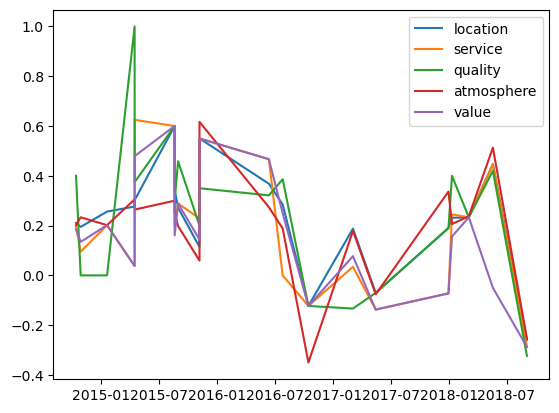

In [11]:
business_id = 'EQ-TZ2eeD_E0BHuvoaeG5Q'


def get_bus_sentiments_over_time(business_id, df): 

    # retrieve rows for that business
    bus_df = df[df['business_id'] == business_id]
    print(bus_df.shape) # ensure that there are enough rows to plot 

    bus_df.loc[:, 'date'] = pd.to_datetime(bus_df['date'])
    bus_df = bus_df.sort_values(by='date')

    x = bus_df['date']
    y_location = bus_df['location']
    y_service = bus_df['service']
    y_quality = bus_df['quality']
    y_atmosphere = bus_df['atmosphere']
    y_value = bus_df['value']
    y_overall = bus_df['overall']

    plt.plot(x, y_location, label='location')
    plt.plot(x, y_service, label='service')
    plt.plot(x, y_quality, label='quality')
    plt.plot(x, y_atmosphere, label='atmosphere')
    plt.plot(x, y_value, label='value')
    #plt.plot(x, y_overall, label='overall')
    plt.legend()

    plt.show()

get_bus_sentiments_over_time(business_id, df)

In [8]:
bus_df = df[df['category'] == 'food']
bus_df['category'].head()

0    food
2    food
3    food
4    food
5    food
Name: category, dtype: object

In [ ]:
def get_cat_sentiments_over_time_interp(category, df): 

    # retrieve rows for that business
    bus_df = df[df['category'] == category]

    bus_df.loc[:, 'date'] = pd.to_datetime(bus_df['date'])
    bus_df = bus_df.sort_values(by='date')

    topics = ['location', 'service', 'quality', 'atmosphere', 'value', 'overall']

    x = bus_df['date']
    for t in topics: 
        plt.plot(x, bus_df[t], label=t)
    plt.legend()

    plt.show()

food


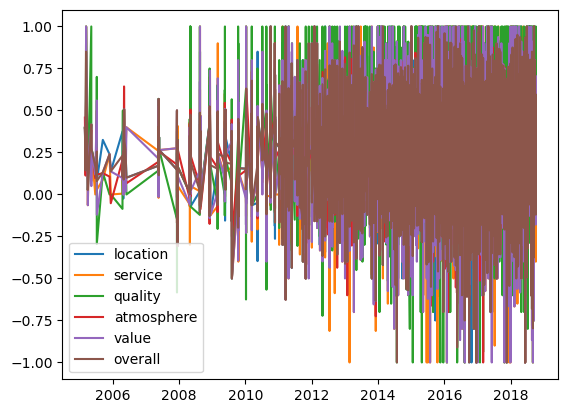

entertainment


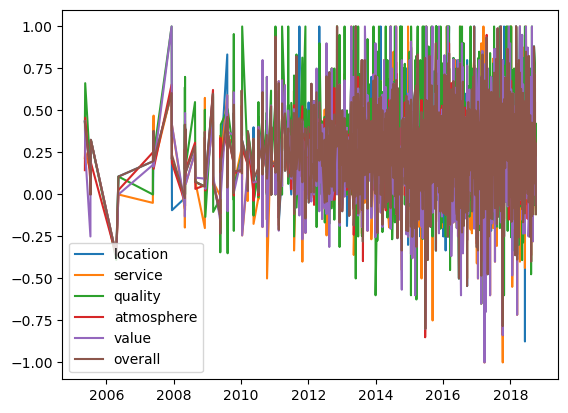

retail


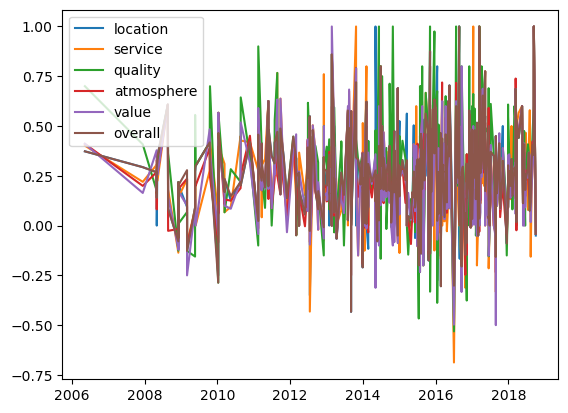

restaurants


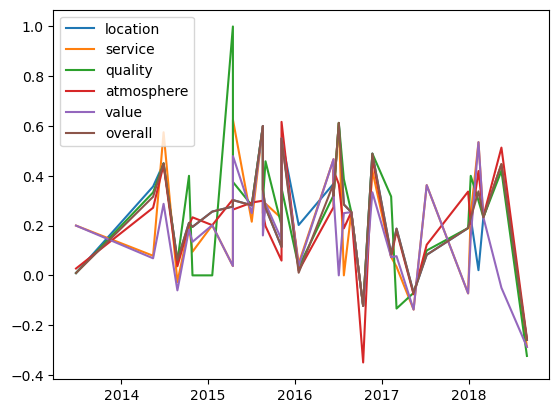

beauty


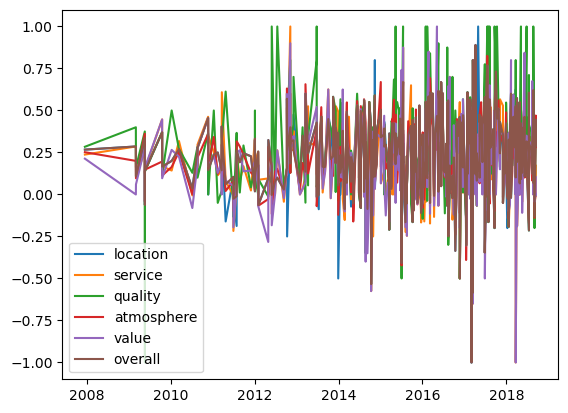

auto


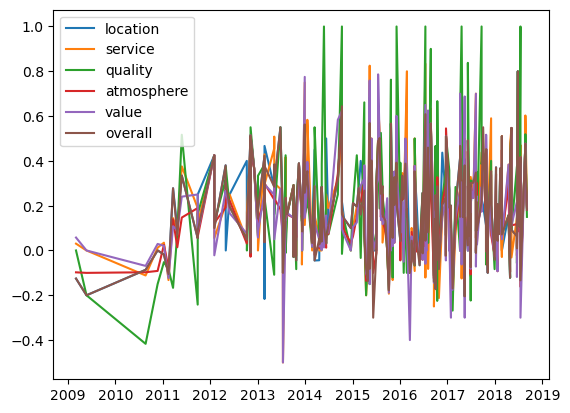

health


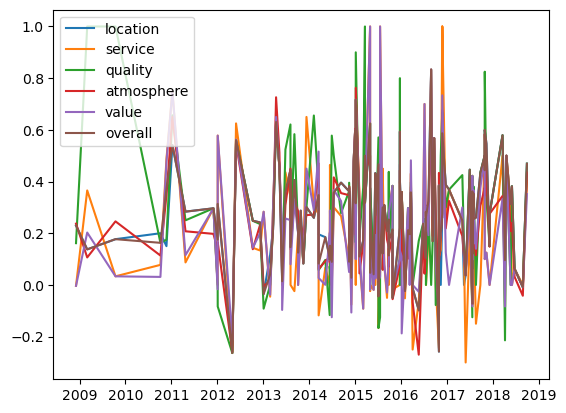

travel


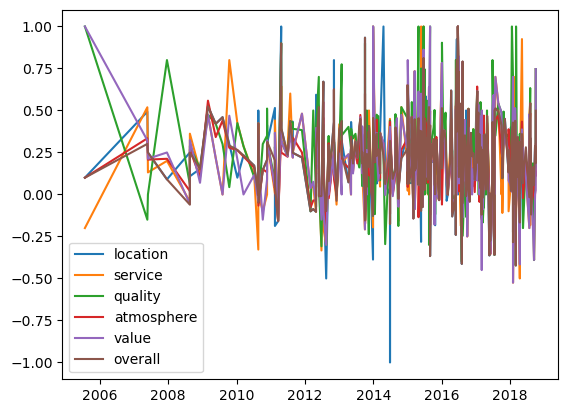

homeservices


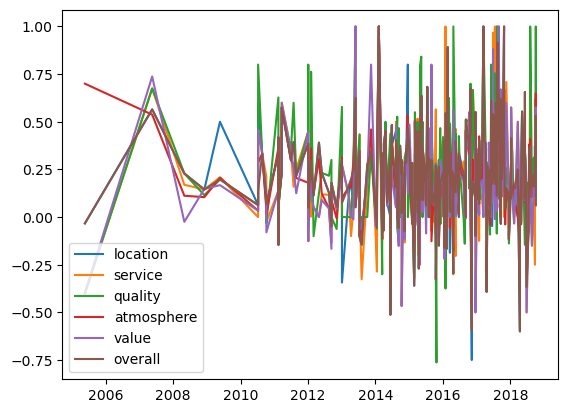

professionalservices


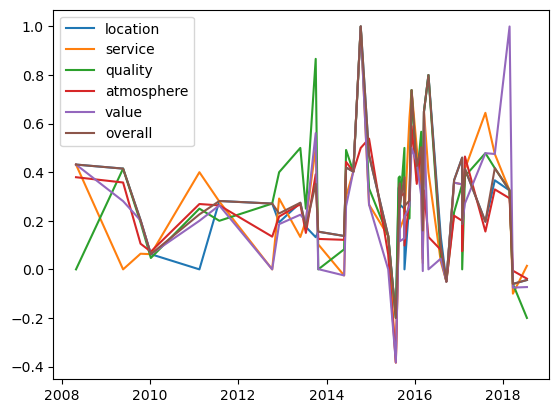

education


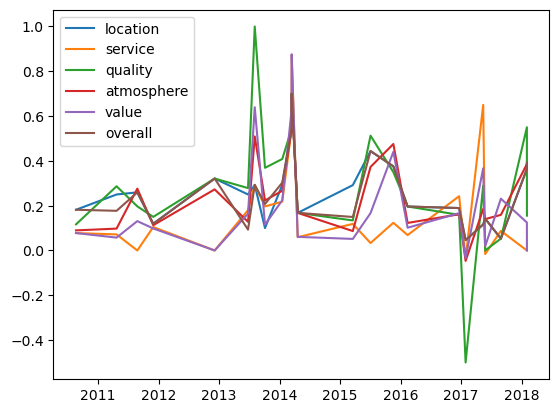

nightlife


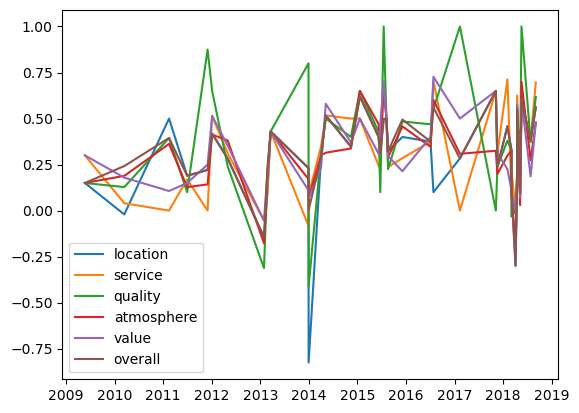

shopping


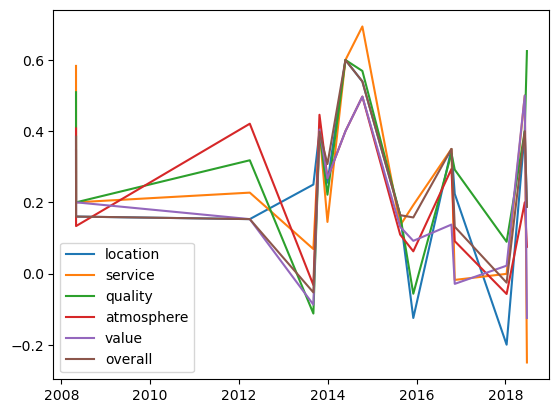

localservices


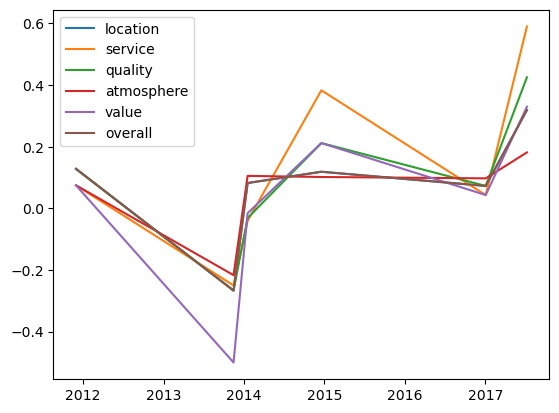

hotelstravel


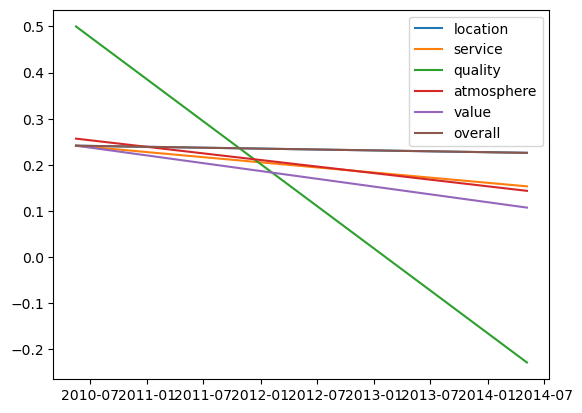

arts


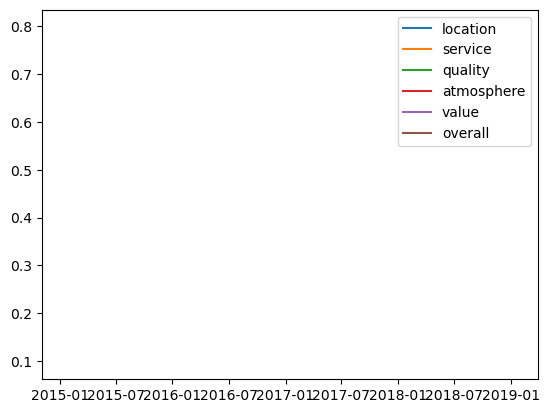

In [20]:
def get_cat_sentiments_over_time(category, df): 

    # retrieve rows for that business
    bus_df = df[df['category'] == category]

    bus_df.loc[:, 'date'] = pd.to_datetime(bus_df['date'])
    bus_df = bus_df.sort_values(by='date')

    x = bus_df['date']
    topics = ['location', 'service', 'quality', 'atmosphere', 'value', 'overall']

    for t in topics: 
        plt.plot(x, bus_df[t], label=t)
    plt.legend()

    plt.show()

for cat in df['category'].unique(): 
    print(cat)
    get_cat_sentiments_over_time_interp(cat, df)

food


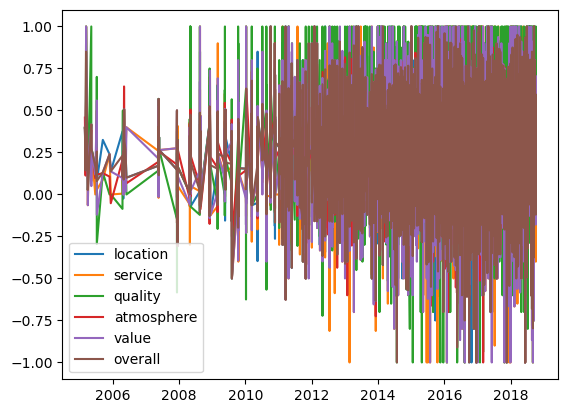

entertainment


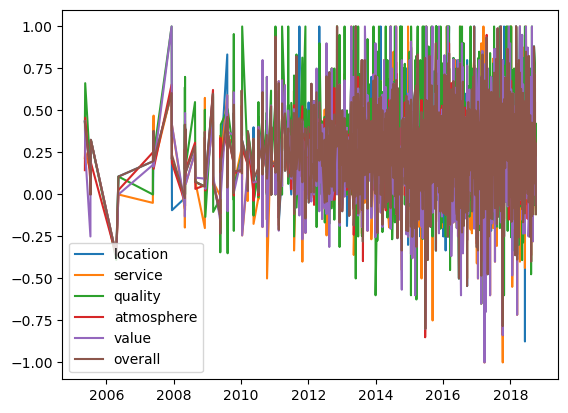

retail


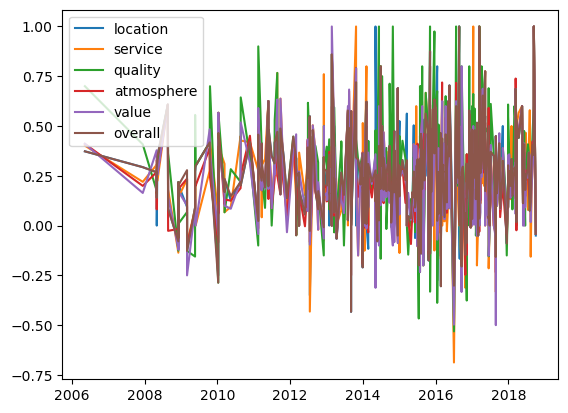

restaurants


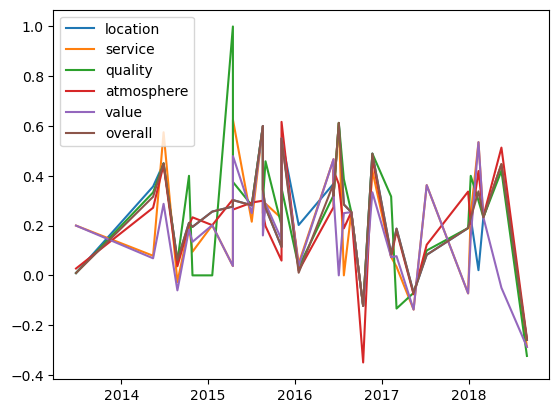

beauty


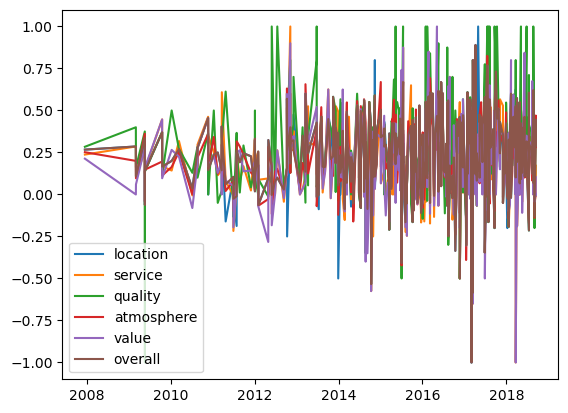

auto


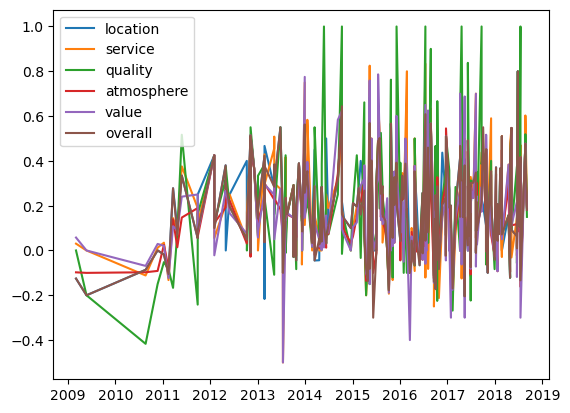

health


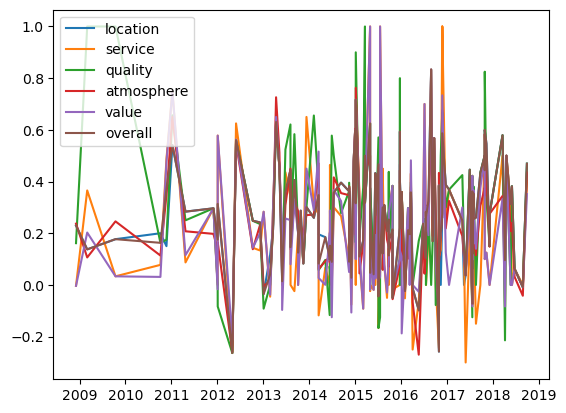

travel


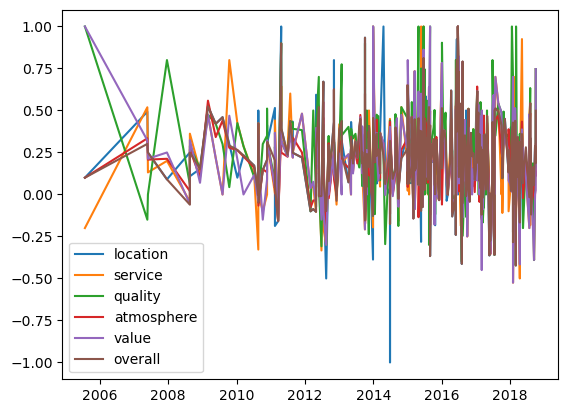

homeservices


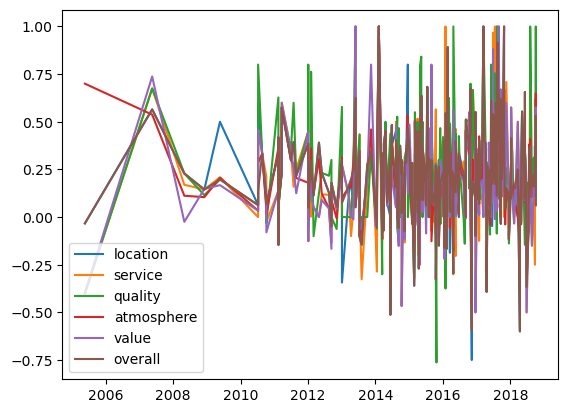

professionalservices


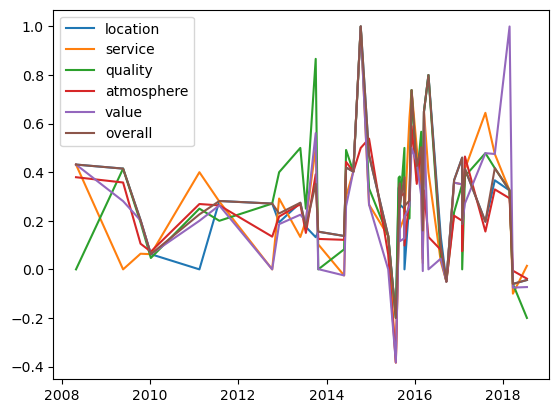

education


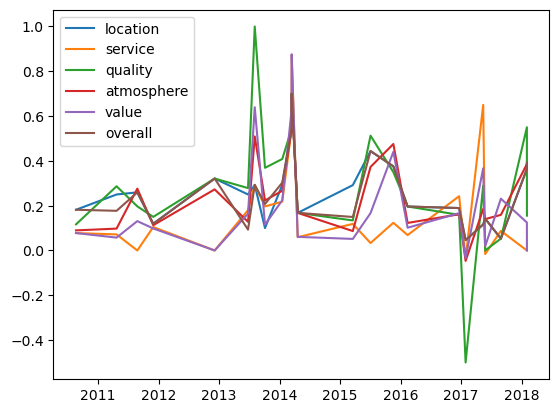

nightlife


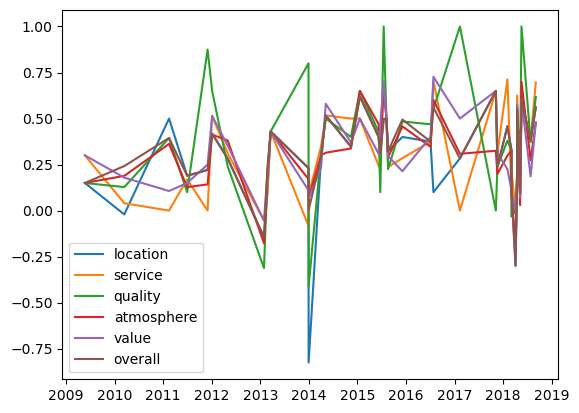

shopping


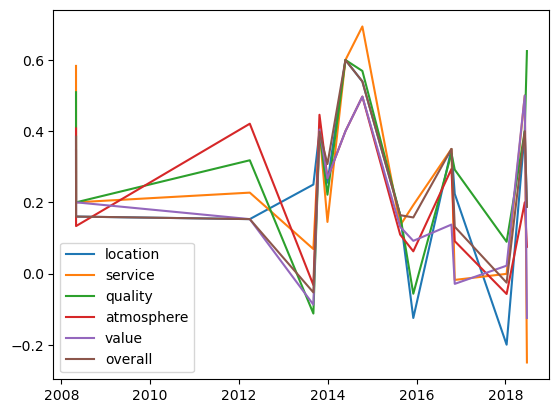

localservices


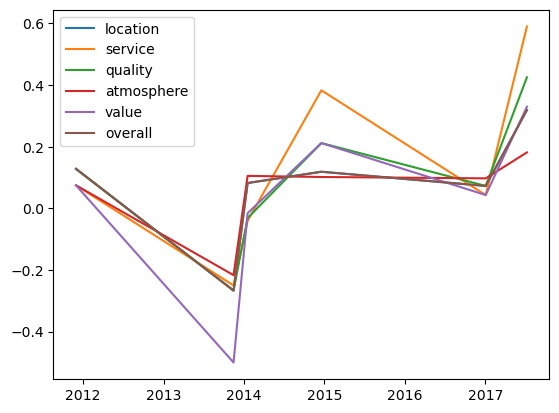

hotelstravel


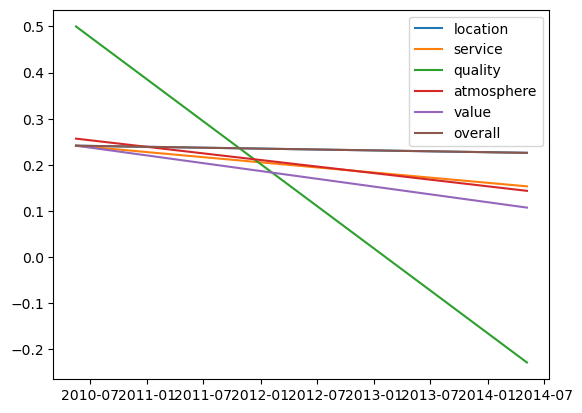

arts


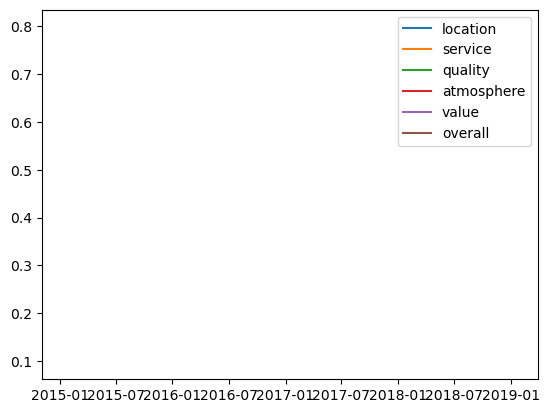

In [21]:

for cat in df['category'].unique(): 
    print(cat)
    get_cat_sentiments_over_time_interp(cat, df)

Try with cursors

In [27]:
!pip3 install mplcursors

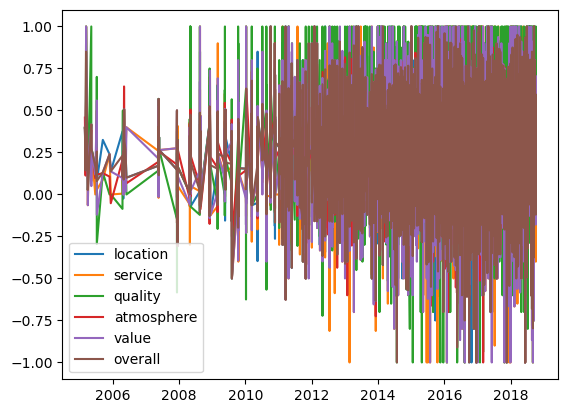

In [28]:
import mplcursors

def get_cat_sentiments_over_time(category, df): 

    # retrieve rows for that business
    bus_df = df[df['category'] == category]

    bus_df.loc[:, 'date'] = pd.to_datetime(bus_df['date'])
    bus_df = bus_df.sort_values(by='date')

    x = bus_df['date']
    topics = ['location', 'service', 'quality', 'atmosphere', 'value', 'overall']

    for t in topics: 
        plt.plot(x, bus_df[t], label=t)
    plt.legend()

    mplcursors.cursor(hover=True)

    plt.show()

get_cat_sentiments_over_time_interp('food', df)